<a href="https://colab.research.google.com/github/raguram/eva/blob/master/S13/YoloV3_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone the repository


In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## Prepare the workspace

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Copy the data

In [0]:
cp -r gdrive/My\ Drive/Colab\ Notebooks/workspace/data/yolov3-shifu/* YoloV3/data/customdata/

### Copy the weights

In [0]:
%mkdir YoloV3/weights
%cp gdrive/My\ Drive/Colab\ Notebooks/workspace/yolov3-spp-ultralytics.pt YoloV3/weights
%cd YoloV3


## View runtime details

In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


## Train YoloV3 on custom dataset

In [28]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-26 10:52:38.921021: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (361 found, 0 missing, 0 empty, 0 duplicate, for 361 images): 100% 361/361 [00:00<00:00, 10509.92it/s]
Caching images (0.2GB): 100% 361/361 [00:00<00:00, 756.62it/s]
Caching labels (361 found, 0 missing, 0 empty, 0 duplicate, for 361 images): 100% 361/361 [00:00<0

## Predict 

In [30]:
!python detect.py --conf-thres 0.1 --output training_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='training_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/465 data/customdata/images/Image_0.jpg: 512x512 1 Shifus, Done. (0.046s)
image 2/465 data/customdata/images/Image_1.jpg: 512x512 1 Shifus, Done. (0.046s)
image 3/465 data/customdata/images/Image_10.jpg: 512x384 1 Shifus, Done. (0.041s)
image 4/465 data/customdata/images/Image_100.jpg: 384x512 1 Shifus, Done. (0.033s)
image 5/465 data/customdata/images/Image_101.jpg: 320x512 1 Shifus, Done. (0.021s)
image 6/465 data/customdata/images/Image_102.jpg: 512x384 1 Shifus, Done. (0.023s)
image 7/465 data/customdata/i

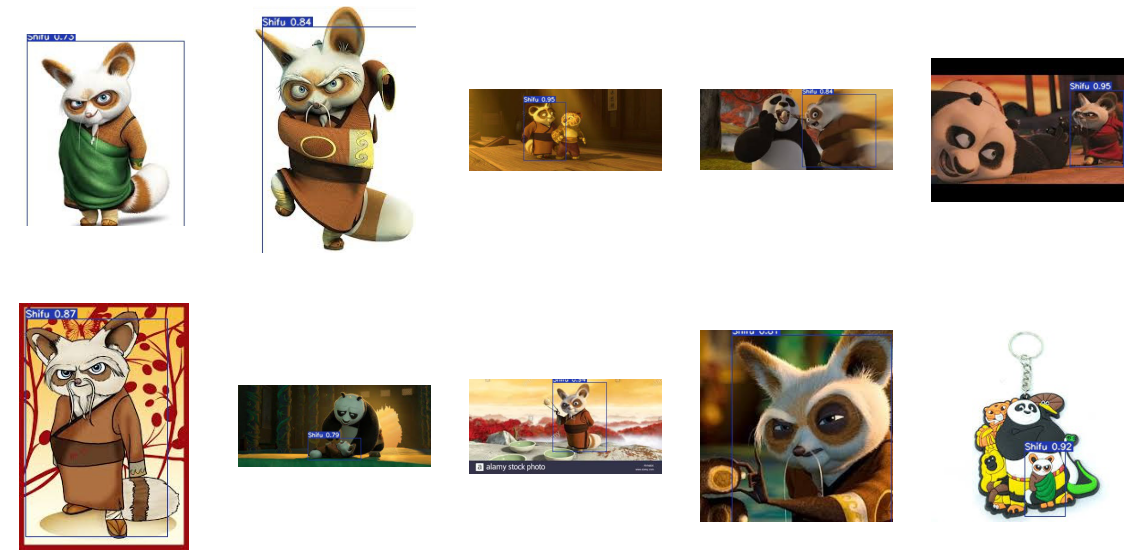

In [50]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

images = ['training_out/Image_0.jpg', 'training_out/Image_10.jpg', 'training_out/Image_52.jpg', 'training_out/Image_53.jpg', 'training_out/Image_40.jpg',
          'training_out/Image_50.jpg', 'training_out/Image_48.jpg', 'training_out/Image_70.jpg','training_out/Image_80.jpg', 'training_out/Image_90.jpg']

figure = plt.figure(figsize=(20, 10))
for index in range(len(images)):
    img=mpimg.imread(images[index])
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(img)



## Copy the weights to drive

In [0]:
!cp "weights/last.pt" /content/gdrive/My\ Drive/Colab\ Notebooks/workspace/last.pt